In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1. Loading and Cleaning Data

In [2]:
df = pd.read_csv("dwell_weather_edited.csv", index_col = "Unnamed: 0")

In [3]:
df.head()

,Day Type,Day Part,Avg Trip Time (min),Month,Year,Month.1,Day,Time,Check_Flag,Average of temp,Average of feels_like,Average of temp_min,Average of temp_max,Average of pressure,Average of humidity,Sum of rain_1h,Average of wind_speed,Average of wind_gust
0,0: All Days (M-Su),05: 4am (4am-5am),20.900000,May,19.0,5.0,0.0,4.0,19504,44.160541,41.684054,41.785135,47.123514,1013.972973,80.459459,8.33,4.962162,8.444483
1,0: All Days (M-Su),10: 9am (9am-10am),27.066667,May,19.0,5.0,0.0,9.0,19509,42.815676,39.944324,40.171351,45.736216,1013.216216,83.162162,6.70,5.323243,8.185625
2,0: All Days (M-Su),11: 10am (10am-11am),14.066667,May,19.0,5.0,0.0,10.0,195010,42.677429,39.514571,39.947143,45.499429,1014.457143,83.885714,6.07,5.592286,10.117692
3,0: All Days (M-Su),12: 11am (11am-12noon),20.900000,May,19.0,5.0,0.0,11.0,195011,44.346970,41.048182,42.161515,47.028182,1014.696970,79.393939,6.22,6.637273,10.064839
4,0: All Days (M-Su),13: 12pm (12noon-1pm),9.966667,May,19.0,5.0,0.0,12.0,195012,46.348750,43.662500,44.130000,49.299063,1014.937500,76.593750,4.51,6.826875,10.668000


### 1.1 Data Cleaning

In [4]:
df = df.drop(["Month", "Check_Flag"], axis=1)

In [5]:
df = df.drop(np.where(df["Day Type"] == "0: All Days (M-Su)")[0])

In [6]:
df = df.reset_index(drop=True)

In [7]:
# sorted(df["Day Part"].unique())

In [8]:
morning = ['05: 4am (4am-5am)','06: 5am (5am-6am)','07: 6am (6am-7am)',
              '08: 7am (7am-8am)', '09: 8am (8am-9am)', '11: 10am (10am-11am)',]
noon = ['12: 11am (11am-12noon)', '12: 11am (11am-12noon)','13: 12pm (12noon-1pm)',
        '14: 1pm (1pm-2pm)','15: 2pm (2pm-3pm)','16: 3pm (3pm-4pm)']
evening = ['17: 4pm (4pm-5pm)','18: 5pm (5pm-6pm)','19: 6pm (6pm-7pm)','20: 7pm (7pm-8pm)','21: 8pm (8pm-9pm)']

In [9]:
df.columns

Index(['Day Type', 'Day Part', 'Avg Trip Time (min)', 'Year', 'Month.1', 'Day',
       'Time', 'Average of temp', 'Average of feels_like',
       'Average of temp_min', 'Average of temp_max', 'Average of pressure',
       'Average of humidity', 'Sum of rain_1h', 'Average of wind_speed',
       'Average of wind_gust'],
      dtype='object')

In [13]:
new_df = pd.DataFrame()

In [14]:
for year in df["Year"].unique():
    for month in df["Month.1"].unique():
        for day in df["Day"].unique():
            temp_df = df.loc[np.where((df["Year"] == year) & (df["Month.1"] == month) & (df["Day"] == day))[0], :]
            new_row = [day, month, year, temp_df["Avg Trip Time (min)"].mean()] +list(temp_df.loc[:, "Average of temp":].mean(skipna=True))
            new_df = new_df.append(pd.Series(new_row), ignore_index=True)
            
#             morning_index = [i for i in temp_df.index if temp_df.loc[i, "Day Part"] in morning]
#             new_row = [1,0, day, month, year, temp_df.loc[morning_index, "Avg Trip Time (min)"].mean(skipna=True)] +list(temp_df.loc[morning_index, "Average of temp":].mean(skipna=True))
#             new_df = new_df.append(pd.Series(new_row), ignore_index=True)
            
            
#             noon_index = [i for i in temp_df.index if temp_df.loc[i, "Day Part"] in noon]
#             new_row = [0,1, day, month, year, temp_df.loc[noon_index, "Avg Trip Time (min)"].mean(skipna=True)] +list(temp_df.loc[noon_index, "Average of temp":].mean(skipna=True))
#             new_df = new_df.append(pd.Series(new_row), ignore_index=True)

            
            
#             evening_index = [i for i in temp_df.index if temp_df.loc[i, "Day Part"] in evening]
#             new_row = [0,0, day, month, year, temp_df.loc[evening_index, "Avg Trip Time (min)"].mean(skipna=True)] +list(temp_df.loc[evening_index, "Average of temp":].mean(skipna=True))
#             new_df = new_df.append(pd.Series(new_row), ignore_index=True)

            

In [15]:
new_df.columns = ["Day", "Month", "Year", 'Avg Trip Time (min)','Average of temp',
       'Average of feels_like', 'Average of temp_min', 'Average of temp_max',
       'Average of pressure', 'Average of humidity', 'Sum of rain_1h',
       'Average of wind_speed', 'Average of wind_gust']

In [13]:
# new_df.columns = ["Morning", "Afternoon", "Day", "Month", "Year", 'Avg Trip Time (min)','Average of temp',
#        'Average of feels_like', 'Average of temp_min', 'Average of temp_max',
#        'Average of pressure', 'Average of humidity', 'Sum of rain_1h',
#        'Average of wind_speed', 'Average of wind_gust']

In [16]:
df = new_df

In [17]:
df["is_summer"] = 0

In [18]:
for i in range(0, len(df)):
    if df.loc[i, "Month"] in [6,7,8]:
        df.loc[i, "is_summer"] =1

In [19]:
df.head()

,Day,Month,Year,Avg Trip Time (min),Average of temp,Average of feels_like,Average of temp_min,Average of temp_max,Average of pressure,Average of humidity,Sum of rain_1h,Average of wind_speed,Average of wind_gust,is_summer
0,1.0,5.0,19.0,17.221429,48.632929,46.856786,45.639643,52.718000,1013.257143,78.792857,1.220000,4.711571,7.659071,0
1,2.0,5.0,19.0,14.622222,47.245833,43.716167,43.662250,51.279583,1011.608333,68.875000,0.860000,9.016167,14.021528,0
2,3.0,5.0,19.0,19.761905,44.762667,40.465714,42.134429,47.884905,1016.457143,66.195238,0.364286,8.097714,13.471071,0
3,4.0,5.0,19.0,23.363636,46.319000,43.705333,42.993364,50.035000,1018.500000,69.436364,0.207273,5.188273,8.200545,0
4,6.0,5.0,19.0,18.003333,49.428533,47.492883,46.456483,52.701400,1013.138333,79.206667,0.417000,7.170933,11.451233,0


In [20]:
df["Tuesday"] = 0
df["Wednesday"] = 0
df["Thursday"] = 0 
df["Friday"] = 0 
df["Saturday"] = 0 
df["Sunday"] = 0

In [21]:
for i in range(0, len(df)):
    if df.loc[i, "Day"] == 1:
        df.loc[i, "Sunday"] = 1
    elif df.loc[i, "Day"] == 3:
        df.loc[i, "Tuesday"] = 1
    elif df.loc[i, "Day"] == 4:
        df.loc[i, "Wednesday"] = 1
    elif df.loc[i, "Day"] == 5:
        df.loc[i, "Thursday"] = 1
    elif df.loc[i, "Day"] == 6:
        df.loc[i, "Friday"] = 1
    elif df.loc[i, "Day"] == 7:
        df.loc[i, "Saturday"] = 1

In [22]:
df.columns

Index(['Day', 'Month', 'Year', 'Avg Trip Time (min)', 'Average of temp',
       'Average of feels_like', 'Average of temp_min', 'Average of temp_max',
       'Average of pressure', 'Average of humidity', 'Sum of rain_1h',
       'Average of wind_speed', 'Average of wind_gust', 'is_summer', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object')

In [23]:
df = df.drop(["Day"], axis=1)

In [24]:
#Find and replace NaN values:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [25]:
rows_with_NaN #fuk

,Month,Year,Avg Trip Time (min),Average of temp,Average of feels_like,Average of temp_min,Average of temp_max,Average of pressure,Average of humidity,Sum of rain_1h,Average of wind_speed,Average of wind_gust,is_summer,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
42,5.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
43,5.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
45,5.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0
46,5.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0
47,5.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0


In [26]:
df = df.drop(df[row_has_NaN].index).reset_index(drop=True)

In [27]:
to_drop = [i for i in range(0, len(df)) if (df.loc[i, "Avg Trip Time (min)"] > 60 or df.loc[i, "Avg Trip Time (min)" ] < 5)]

In [28]:
df = df.drop(to_drop, axis=0).reset_index(drop=True)

### 1.2 Checking y-range

In [29]:
print(min(df["Avg Trip Time (min)"]))
print(np.mean(df["Avg Trip Time (min)"]))
print(max(df["Avg Trip Time (min)"]))

9.283333333
23.727099033161235
44.58888888822223


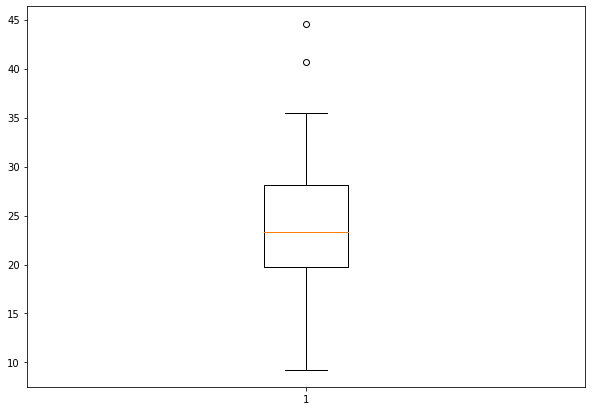

In [30]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(df["Avg Trip Time (min)"])
# show plot
plt.show()

### 1.3 Data Splitting

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
columns_for_modeling = [i for i in df.columns if i != "Avg Trip Time (min)"]

In [33]:
#Main split for training and splitting:
x_train, x_test, y_train, y_test = train_test_split(df[columns_for_modeling], df["Avg Trip Time (min)"], test_size=0.33)

In [34]:
#Second split for parameter tuning:
x_train_1, x_test_val, y_train_1, y_test_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [35]:
x_train_1.columns

Index(['Month', 'Year', 'Average of temp', 'Average of feels_like',
       'Average of temp_min', 'Average of temp_max', 'Average of pressure',
       'Average of humidity', 'Sum of rain_1h', 'Average of wind_speed',
       'Average of wind_gust', 'is_summer', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday'],
      dtype='object')

# 2.  Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV

### 2.1 Linear

In [37]:
reg = LinearRegression().fit(x_train, y_train)

In [38]:
reg.score(x_train, y_train)

0.4550033812789981

In [39]:
pred  = reg.predict(x_test)

In [40]:
mean_squared_error(pred, y_test, squared = False)

6.1992332888075

In [41]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [42]:
import statsmodels.api as sm
from scipy import stats

In [43]:
# x_train_ols = x_train
# x_test_ols = x_test

# x_train_ols["intercept"] = 1
# x_test_ols["interccept"] =1

In [44]:
est = sm.OLS(y_train, x_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Avg Trip Time (min)   R-squared (uncentered):                   0.962
Model:                             OLS   Adj. R-squared (uncentered):              0.951
Method:                  Least Squares   F-statistic:                              88.14
Date:                 Mon, 18 Apr 2022   Prob (F-statistic):                    3.12e-37
Time:                         18:39:35   Log-Likelihood:                         -239.51
No. Observations:                   80   AIC:                                      515.0
Df Residuals:                       62   BIC:                                      557.9
Df Model:                           18                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [45]:
pred = est2.predict(x_test)

In [46]:
mean_squared_error(pred, y_test, squared = False)

6.139369664362359

### 2.2 Ridge

In [47]:
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)

Ridge()

In [48]:
pred = model.predict(x_test)

In [49]:
mean_squared_error(pred, y_test, squared = False)

6.19168592169429

### 2.2.1 Optimal alpha for Ridge

In [50]:
alphas = np.linspace(0,.5,11)

In [51]:
fits = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(x_train_1, y_train_1)
    pred = model.predict(x_test_val)
    test_pred = model.predict(x_train_1)
    res = [mean_squared_error(pred, y_test_val, squared = False),mean_squared_error(test_pred, y_train_1, squared = False)]
    fits.append(res)

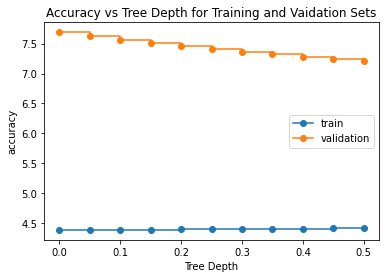

In [52]:
val_scores = [i[0] for i in fits]
train_scores = [i[1] for i in fits]

fig, ax = plt.subplots()
ax.set_xlabel("Tree Depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Tree Depth for Training and Vaidation Sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

#Nothing interesting, rip

### 2.2.2 RidgeCV

In [53]:
model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)

In [54]:
pred = model.predict(x_test)

In [55]:
mean_squared_error(pred, y_test, squared = False)

6.191685921697594

### 2.3 Lasso

In [56]:
model = Lasso().fit(x_train, y_train)

In [57]:
pred = model.predict(x_test)

In [59]:
mean_squared_error(pred, y_test, squared = False)

5.639858808434533

# 3. Support Vector Regression

In [60]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [61]:
regr = make_pipeline(StandardScaler(), SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1))

In [62]:
regr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, coef0=1, gamma='auto', kernel='poly'))])

In [63]:
pred = regr.predict(x_test)

In [64]:
mean_squared_error(y_test, pred, squared=False)

9.080019469507008

### 3.2 RBF Kernal

In [65]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(x_train, y_train)
pred_rbf = svr_rbf.predict(x_test)
mean_squared_error(y_test, pred_rbf, squared=False)

6.1588359565459525

### 3.3 Linear Kernal

In [66]:
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_lin.fit(x_train, y_train)
pred_lin = svr_lin.predict(x_test)
mean_squared_error(y_test, pred_lin, squared=False)

20.77336061327452

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
#Most basic model:
regr = RandomForestRegressor(random_state=0)
regr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [69]:
pred = regr.predict(x_test)

In [70]:
mean_squared_error(pred, y_test, squared = False)

5.995632456014772

In [71]:
#Most basic model:
regr_1 = RandomForestRegressor(random_state=0, criterion="mae")
regr_1.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', random_state=0)

In [72]:
pred_1 = regr_1.predict(x_test)

In [73]:
mean_squared_error(pred_1, y_test, squared = False)

5.785378811774551

### 4.2 Fitting for Max Depth

In [ ]:
fits = []
max_depth = [i for i in range(2, 20)]
322.52
for depth in max_depth:
    fit = RandomForestRegressor(max_depth=depth)
    fit.fit(x_train_1, y_train_1)
    res = [mean_squared_error(fit.predict(x_train_1), y_train_1, squared = False), mean_squared_error(fit.predict(x_test_val), y_test_val, squared = False)]
    fits.append(res)

In [ ]:
train_scores = [i[0] for i in fits]
val_scores = [i[1] for i in fits]

fig, ax = plt.subplots()
ax.set_xlabel("Tree Depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Tree Depth for Training and Vaidation Sets")
ax.plot(max_depth, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(max_depth, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
fits = []
max_depth = [i for i in range(2, 20)]
322.52
for depth in max_depth:
    fit = RandomForestRegressor(max_depth=depth, criterion = 'mae')
    fit.fit(x_train_1, y_train_1)
    res = [mean_squared_error(fit.predict(x_train_1), y_train_1, squared = False), mean_squared_error(fit.predict(x_test_val), y_test_val, squared = False)]
    fits.append(res)

In [ ]:
train_scores = [i[0] for i in fits]
val_scores = [i[1] for i in fits]

fig, ax = plt.subplots()
ax.set_xlabel("Tree Depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Tree Depth for Training and Vaidation Sets")
ax.plot(max_depth, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(max_depth, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

### 4.3 Fitting for Number of Estimators

In [ ]:
fits = []
estimator_count = [i for i in range(50, 100)]

for est in estimator_count:
    fit = RandomForestRegressor(n_estimators=est)
    fit.fit(x_train_1, y_train_1)
    res = [mean_squared_error(fit.predict(x_train_1), y_train_1, squared = False), mean_squared_error(fit.predict(x_test_val), y_test_val, squared = False)]
    fits.append(res)

In [ ]:
train_scores = [i[0] for i in fits]
val_scores = [i[1] for i in fits]

fig, ax = plt.subplots()
ax.set_xlabel("Number of Estimators")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Number of Estimators for Training and Vaidation Sets")
ax.plot(estimator_count, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(estimator_count, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
fits = []
estimator_count = [i for i in range(50, 100)]

for est in estimator_count:
    fit = RandomForestRegressor(n_estimators=est, criterion= 'mae')
    fit.fit(x_train_1, y_train_1)
    res = [mean_squared_error(fit.predict(x_train_1), y_train_1, squared = False), mean_squared_error(fit.predict(x_test_val), y_test_val, squared = False)]
    fits.append(res)

In [ ]:
train_scores = [i[0] for i in fits]
val_scores = [i[1] for i in fits]

fig, ax = plt.subplots()
ax.set_xlabel("Number of Estimators")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Number of Estimators for Training and Vaidation Sets")
ax.plot(estimator_count, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(estimator_count, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

### 4.4 Fitting for ccp_alpha

In [ ]:
np.linspace(0,1,101)

In [ ]:
fits = []
alphas = np.linspace(0,1,11)

for alpha in alphas:
    fit = RandomForestRegressor(ccp_alpha=alpha)
    fit.fit(x_train_1, y_train_1)
    res = [mean_squared_error(fit.predict(x_train_1), y_train_1, squared = False), mean_squared_error(fit.predict(x_test_val), y_test_val, squared = False)]
    fits.append(res)

In [ ]:
train_scores = [i[0] for i in fits]
val_scores = [i[1] for i in fits]

fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs ccp_alpha for Training and Vaidation Sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
fits = []
alphas = np.linspace(0,1,11)

for alpha in alphas:
    fit = RandomForestRegressor(ccp_alpha=alpha, criterion = 'mae')
    fit.fit(x_train_1, y_train_1)
    res = [mean_squared_error(fit.predict(x_train_1), y_train_1, squared = False), mean_squared_error(fit.predict(x_test_val), y_test_val, squared = False)]
    fits.append(res)

In [ ]:
train_scores = [i[0] for i in fits]
val_scores = [i[1] for i in fits]

fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs ccp_alpha for Training and Vaidation Sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

## 5. Ensemble Models